In [2]:
import numpy as np
import matplotlib.pyplot as plt

# in cm
raw_data = """
60	70
28.5	31.5
66	71
50	56
77	86
"""

L_vals = np.array([1,0.5,1,1,1])


def calc_wv(low,high, L):
    # assuming low and high are given in cm, need to convert to meters so
    low*=1e-2
    high*=1e-2
    d = 1e-6
    y = (high+low)/2
    s_y = (high-low)/2
    
    wv = (d*y)/np.sqrt(L**2+y**2)
    h_lam = d*(y+s_y)/np.sqrt(L**2+(y+s_y)**2)
    l_lam = d*(y-s_y)/np.sqrt(L**2+(y-s_y)**2)
    
    s_wv = (np.abs(h_lam-wv)+np.abs(l_lam-wv))/2.

    # now convert to nm for final
    #wv*=1e9
    #s_wv*=1e9
    return wv,s_wv

data = np.fromstring(raw_data,sep=' ').reshape(-1,2)
wvs = data
c=0
for i in data:
    wvs[c,0],wvs[c,1] = calc_wv(i[0],i[1],L_vals[c])
    c+=1

print(wvs)

[[5.44988351e-07 2.94832945e-08]
 [5.14495755e-07 1.89173062e-08]
 [5.65127468e-07 1.40398554e-08]
 [4.68293637e-07 2.06948867e-08]
 [6.31759219e-07 2.09728345e-08]]


[ 9.19070959e-07 -1.16688175e-01]
[5.09591443e-07 9.49026064e-01]


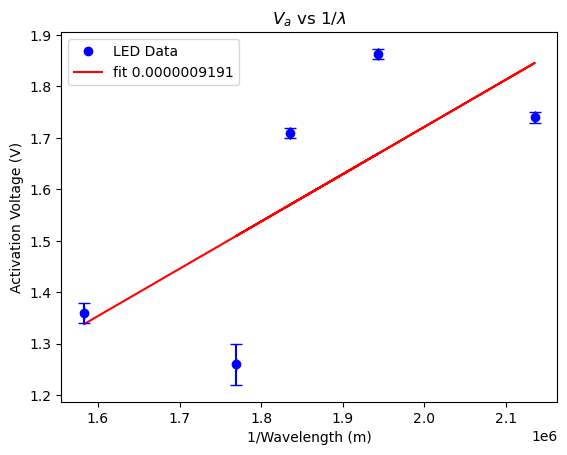

In [50]:
## V (+-)
raw_volt = """
1.71	0.01
1.863	0.01
1.26	0.04
1.74	0.01
1.36	0.02
"""

volt_data = np.fromstring(raw_volt,sep=' ').reshape(-1,2)

plt.xlabel('1/Wavelength (m)')
plt.ylabel('Activation Voltage (V)')
plt.title('$V_{a}$ vs $1/\lambda$')

plt.plot(1/wvs[:,0],volt_data[:,0], 'bo',label='LED Data')

fit,cov = np.polyfit(1/wvs[:,0],volt_data[:,0],1,cov=True)
p = np.poly1d(fit)
plt.plot(1/wvs[:,0], p(1/wvs[:,0]),'r',label=(f'fit {fit[0]:.10f}'))
# slope
print(fit)
# uncertainty on slope?
print(np.sqrt(np.diag(cov)))
plt.errorbar(1/wvs[:,0],volt_data[:,0],yerr=volt_data[:,1],xerr=(wvs[:,1]),fmt='b.',capsize=4)
plt.legend()
plt.show()


Fitted slope: 0.7023932048597552 +- 0.07087495863758067
X-axis intercept: 2.031 V


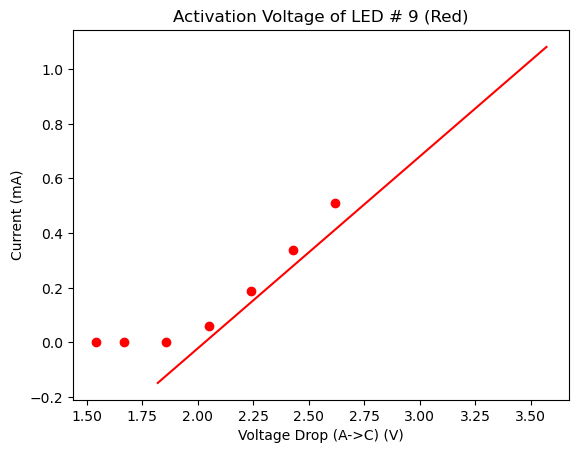

In [7]:
### method 2

led_9_raw = """
0.003	1.856
0.059	2.05
0.188	2.24
0.34	2.43
0.51	2.62
0	1.54
0	1.67
"""

led_8_raw = """
0	2.8
0.017	2.99
0.043	3.05
0.234	3.32
0.12	3.18
0.27	3.37
0.44	3.56
"""

led_3_raw = """
0	1.915
0.029	2.16
0.283	2.55
0.44	2.74
0.62	2.93
0.8	3.12
0.98	3.31
"""

led_2_raw = """
0	1.67
0	1.91
0	2.17
0.003	2.56
0.055	2.74
0.18	2.93
0.34	3.12
"""

led_1_raw = """
0	1.82
0	2
0.07	2.3
0.26	2.55
0.54	2.88
0.82	3.18
1.18	3.57
"""

led_9 = np.fromstring(led_9_raw,sep=' ').reshape(-1,2)
led_8 = np.fromstring(led_8_raw,sep=' ').reshape(-1,2)
led_3 = np.fromstring(led_3_raw,sep=' ').reshape(-1,2)
led_2 = np.fromstring(led_2_raw,sep=' ').reshape(-1,2)
led_1 = np.fromstring(led_1_raw,sep=' ').reshape(-1,2)


plt.ylabel('Current (mA)')
plt.xlabel('Voltage Drop (A->C) (V)')
plt.title('Activation Voltage of LED # 9 (Red)')
plt.plot(led_9[:,1],led_9[:,0],'ro')
#plt.plot(led_8[:,1],led_8[:,0],'bo')
#plt.plot(led_3[:,1],led_3[:,0],'yo')
#plt.plot(led_2[:,1],led_2[:,0],'go')
#plt.plot(led_1[:,1],led_1[:,0],'go')

fit_parms = """
0.003	1.856
0.059	2.05
0.188	2.24
0.34	2.43
0.51	2.62
"""
fits = np.fromstring(fit_parms,sep=' ').reshape(-1,2)
fits = led_1
fit,cov = np.polyfit(fits[:,1],fits[:,0],1,cov=True)
p = np.poly1d(fit)
plt.plot(fits[:,1], p(fits[:,1]),'r',label=(f'fit {fit[0]:.4f}'))
#plt.legend()
print(f'Fitted slope: {fit[0]} +- {np.sqrt(np.diag(cov))[0]}')
print(f'X-axis intercept: {-fit[1]/fit[0]:.3f} V')

# I did this for each and recorded the voltages separately

Fitted slope: 1.9533826304686507e-06 +- 5.781052842671203e-07


Text(0.5, 1.0, 'Activation Voltage vs $1/\\lambda$')

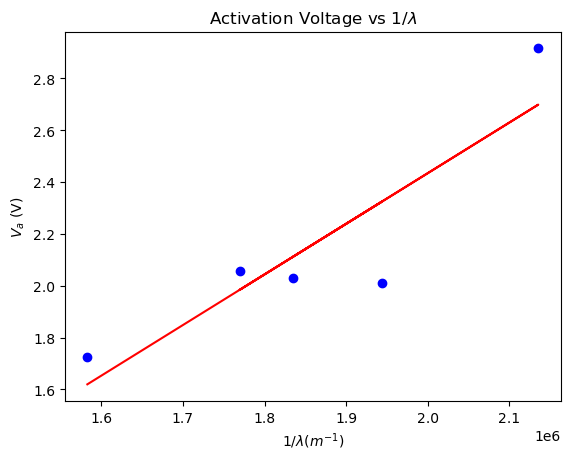

In [10]:
v_a_data = """
2.243 0.019
2.600 0.087
2.174 0.038
2.993 0.037
1.915 0.068
"""

v_a_data = """
2.031 0.0787
2.010 0.0670
2.057 0.0598
2.916 0.0757
1.724 0.0815
"""
v_a = np.fromstring(v_a_data,sep=' ').reshape(-1,2)

plt.plot(1/wvs[:,0],v_a[:,0],'bo')
fit,cov = np.polyfit((1/wvs[:,0]),v_a[:,0],1,cov=True)
p = np.poly1d(fit)
plt.plot(1/wvs[:,0], p(1/wvs[:,0]),'r',label=(f'fit {fit[0]:.10f}'))
#plt.legend()
print(f'Fitted slope: {fit[0]} +- {np.sqrt(np.diag(cov))[0]}')

plt.xlabel('$1/\lambda (m^{-1})$')
plt.ylabel('$V_a$ (V)')
plt.title('Activation Voltage vs $1/\lambda$')

## then get plancks from h=m*e/c (m=slope)